# 1. Introduction

### 1.1 Background of Study

Sequence prediction challenges have a been around us for quite awhile and are considered by
some, as one of the hardest problems to deal with in the data science field. This is where Long
Short-Term Memory (LSTM) networks come into the picture, as it has the potential of
providing an effective solution. An LSTM is an improved version of RNN as it is capable of
learning long-term dependencies. It is usually considered to be more complex but easier to train
due to its ability to avoid the vanishing gradient problem.1
The concept of LSTM networks was introduced by Hochreiter and Schmidhuber in 1997, and was
further refined by many people that work in this related field. Due to its capability of working with
various types of problems, it is widely used by many industries and organizations.
Our study will be focused on Human Activity Recognition (HAR) using a smartphones dataset and an
LSTM RNN.2 This research has been conducted by Guillaume Chevalier (2016) and is available in his
GitHub repository.

### 1.2 Problem Background

Human Activity Recognition is a broad area which focuses on Identifying specific human movements
or actions based on sensor data. Movements would be typical activities like walking, sitting, laying on
a bed. The sensor data can be collected in many ways like videos, radar etc.
The purpose of this project is to identify human behaviour using smartphone dataset. The smartphone
is attached to the wrist and based on accelerometer and gyroscopes It will help to recognize the type of
activity that the user is doing, for example - walking in a lobby or laying on a bed.
The problem or challenge is to predict the activity with the small number of sensor data. Generally, this
problem is called as univariate or multivariate time series classification task. This type of issue can
easily be solved using deep learning. In this project, we are going to implement Recurrent Neural
Network with LSTM(Long-Short Term Memory).

### 1.3 Objective

- Identify human activity which includes walking, walking upstairs, walking downstairs,
sitting, standing, laying.
- In-depth learning of Recurrent Neural Networks with LSTM
- Implement LSTM using TensorFlow

### 1.4 Expected Outcome

By giving the images of human activity  as input, the model should be able to recognize what kind of activity is being done such as walking, going down, going up. The model also should have good prediction accuracy of higer than 60%.

## 2 Dataset
We will be using UCI machine learning archieve dataset to train and test our model. Source of this dataset is here: https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
A video link of how the dataset was collected:  https://www.youtube.com/watch?v=XOEN9W05_4A&feature=youtu.be
According to documentation the description of dataset is as follows: 

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

import seaborn as sns
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
#from lightgbm import LGBMClassifier

# To measure time
from time import time

In [2]:
# loding data
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

train_df['Data'] = 'Train'
test_df['Data'] = 'Test'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

# creating  label
label = both_df.pop('Activity')

print('Shape of trining data: \t', train_df.shape)
print('Shape of testing data: \t', test_df.shape)

train_df.head()


Shape of trining data: 	 (7352, 564)
Shape of testing data: 	 (2947, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


### Exploratory Data Analysis
This dataset contains 564 columns which is seems to be overhelming at a first glance. But 
if we have a closer look we can easily spot out that many columns contains same stem. Let's 
group them together.

In [3]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well.

Impressive how many features there are in regard of the limited number of sensors used.

### Checking for Missing values

In [4]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


It's clear that there are 561 columns with numeric values and 2 columns contain categorical values which are created by us the 'data' and 'subject'. We are assure from the output of avobe code is that there is/are no missing values.

## Determining no of observation for each class

In [5]:
# Plotting data
label_counts = label.value_counts()

# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]


#plt.bar(label_counts.index, label_counts)

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

Although there are fluctuations in the label counts, the labels are quite equally distributed.

Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs. 
Disregarding the possibility of flawed data, the participants seem to walk roughly 10% faster downwards.

## Activity Exploration
Let's explore the dataset to determine each of the activity class are separable from the other class. In other words determining intra-class and inter-class similarities among different class of activities.

From the plot below we can see that the classes are highly separable which will definitely help out model to distingusih classes with high accuracy.

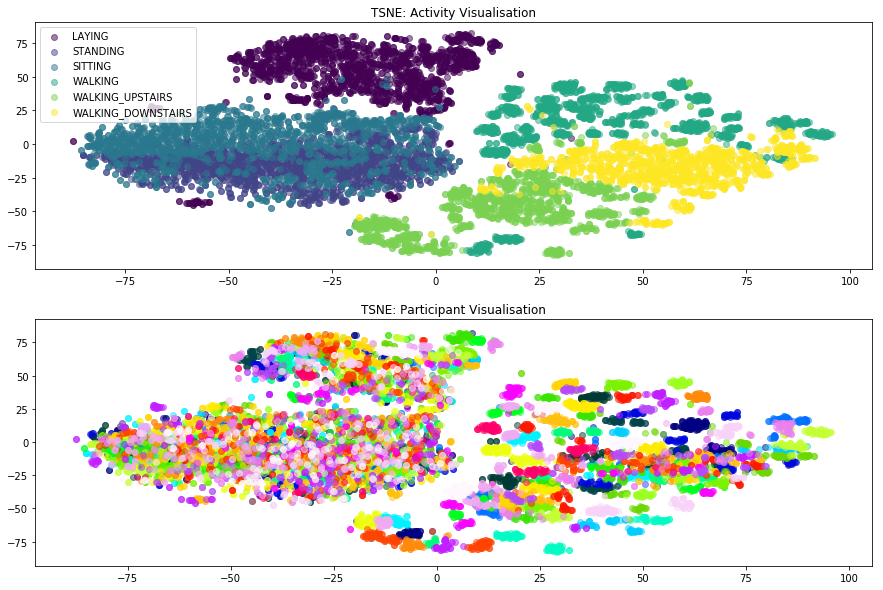

In [6]:
# Create datasets
tsne_data = both_df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()